In [1]:
import pandas as pd
import numpy as np

### 파일 불러오기

In [2]:
data = pd.read_excel("test_kiosk.xlsx")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   타임스탬프              151 non-null    datetime64[ns]
 1   귀하의 성별은 무엇입니까?     151 non-null    object        
 2   귀하의 연령대는 무엇입니까?    151 non-null    object        
 3   귀하의 거주 지역은 어디입니까?  151 non-null    object        
 4   오늘 기분은 어떠십니까?      151 non-null    object        
 5   1순위 음식 분야          151 non-null    object        
 6   2순위 음식 분야          151 non-null    object        
 7   3순위 음식 분류          151 non-null    object        
 8   1_한식               58 non-null     object        
 9   2_한식               35 non-null     object        
 10  3_한식               32 non-null     object        
 11  1_분식               13 non-null     object        
 12  2_분식               15 non-null     object        
 13  3_분식               23 non-null     object        
 14  1_양식      

In [4]:
data.head()

,타임스탬프,귀하의 성별은 무엇입니까?,귀하의 연령대는 무엇입니까?,귀하의 거주 지역은 어디입니까?,오늘 기분은 어떠십니까?,1순위 음식 분야,2순위 음식 분야,3순위 음식 분류,1_한식,2_한식,...,3_분식,1_양식,2_양식,3_양식,1_일식,2_일식,3_일식,1_중식,2_중식,3_중식
0,2021-05-16 14:44:29.050,남자,청년 (만 19세~만 34세 이하),"수도권 (경기, 인천)",행복하다 · 즐겁다 · 신난다,한식,일식,중식,"불고기, 김치찌개",NaN,...,NaN,NaN,NaN,NaN,NaN,"돈가스, 초밥",NaN,NaN,NaN,짬뽕
1,2021-05-16 15:41:43.497,여자,중장년 (만 35세~만 64세 이하),서울,화가 난다 · 짜증난다,한식,중식,일식,불고기,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,메밀소바,NaN,볶음밥,NaN
2,2021-05-16 15:44:12.635,남자,청년 (만 19세~만 34세 이하),서울,아무 생각 없다,일식,양식,한식,NaN,NaN,...,NaN,NaN,스테이크,NaN,"돈가스, 메밀소바",NaN,NaN,NaN,NaN,NaN
3,2021-05-16 15:46:32.896,여자,청년 (만 19세~만 34세 이하),서울,행복하다 · 즐겁다 · 신난다,일식,한식,분식,NaN,비빔밥,...,떡볶이,NaN,NaN,NaN,초밥,NaN,NaN,NaN,NaN,NaN
4,2021-05-16 16:15:52.830,남자,청년 (만 19세~만 34세 이하),경상도,행복하다 · 즐겁다 · 신난다,양식,일식,분식,NaN,NaN,...,떡볶이,햄버거,NaN,NaN,NaN,"돈가스, 초밥",NaN,NaN,NaN,NaN


# 전처리

### 컬럼명 변경

In [5]:
data.columns

Index(['타임스탬프', '귀하의 성별은 무엇입니까?', '귀하의 연령대는 무엇입니까?', '귀하의 거주 지역은 어디입니까?',
       '오늘 기분은 어떠십니까?', '1순위 음식 분야', '2순위 음식 분야', '3순위 음식 분류', '1_한식', '2_한식',
       '3_한식', '1_분식', '2_분식', '3_분식', '1_양식', '2_양식', '3_양식', '1_일식', '2_일식',
       '3_일식', '1_중식', '2_중식', '3_중식'],
      dtype='object')

In [6]:
data.rename(columns={'타임스탬프':'시간대',
                     '귀하의 성별은 무엇입니까?':'성별',
                     '귀하의 연령대는 무엇입니까?':'연령대',
                     '귀하의 거주 지역은 어디입니까?':'지역',
                     '오늘 기분은 어떠십니까?':'기분',
                     '1순위 음식 분야':'1순위',
                     '2순위 음식 분야':'2순위',
                     '3순위 음식 분류':'3순위'}, inplace=True)

In [7]:
data.head(3)

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,1_한식,2_한식,...,3_분식,1_양식,2_양식,3_양식,1_일식,2_일식,3_일식,1_중식,2_중식,3_중식
0,2021-05-16 14:44:29.050,남자,청년 (만 19세~만 34세 이하),"수도권 (경기, 인천)",행복하다 · 즐겁다 · 신난다,한식,일식,중식,"불고기, 김치찌개",NaN,...,NaN,NaN,NaN,NaN,NaN,"돈가스, 초밥",NaN,NaN,NaN,짬뽕
1,2021-05-16 15:41:43.497,여자,중장년 (만 35세~만 64세 이하),서울,화가 난다 · 짜증난다,한식,중식,일식,불고기,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,메밀소바,NaN,볶음밥,NaN
2,2021-05-16 15:44:12.635,남자,청년 (만 19세~만 34세 이하),서울,아무 생각 없다,일식,양식,한식,NaN,NaN,...,NaN,NaN,스테이크,NaN,"돈가스, 메밀소바",NaN,NaN,NaN,NaN,NaN


### 날짜, 시간 열 추가

In [8]:
data['시간대'] = pd.to_datetime(data['시간대'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   시간대     151 non-null    datetime64[ns]
 1   성별      151 non-null    object        
 2   연령대     151 non-null    object        
 3   지역      151 non-null    object        
 4   기분      151 non-null    object        
 5   1순위     151 non-null    object        
 6   2순위     151 non-null    object        
 7   3순위     151 non-null    object        
 8   1_한식    58 non-null     object        
 9   2_한식    35 non-null     object        
 10  3_한식    32 non-null     object        
 11  1_분식    13 non-null     object        
 12  2_분식    15 non-null     object        
 13  3_분식    23 non-null     object        
 14  1_양식    35 non-null     object        
 15  2_양식    33 non-null     object        
 16  3_양식    31 non-null     object        
 17  1_일식    29 non-null     object        
 18  2_일식    35

In [10]:
# data['월'] = data['시간'].dt.month
# data['일'] = data['시간'].dt.day
# data['시'] = data['시간'].dt.hour
# data['분'] = data['시간'].dt.minute

In [11]:
data['날짜'] = data['시간대'].dt.strftime('%m-%d')
data['시간'] = data['시간대'].dt.strftime('%H:%M')

In [12]:
data.head(3)

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,1_한식,2_한식,...,2_양식,3_양식,1_일식,2_일식,3_일식,1_중식,2_중식,3_중식,날짜,시간
0,2021-05-16 14:44:29.050,남자,청년 (만 19세~만 34세 이하),"수도권 (경기, 인천)",행복하다 · 즐겁다 · 신난다,한식,일식,중식,"불고기, 김치찌개",NaN,...,NaN,NaN,NaN,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,05-16,14:44
1,2021-05-16 15:41:43.497,여자,중장년 (만 35세~만 64세 이하),서울,화가 난다 · 짜증난다,한식,중식,일식,불고기,NaN,...,NaN,NaN,NaN,NaN,메밀소바,NaN,볶음밥,NaN,05-16,15:41
2,2021-05-16 15:44:12.635,남자,청년 (만 19세~만 34세 이하),서울,아무 생각 없다,일식,양식,한식,NaN,NaN,...,스테이크,NaN,"돈가스, 메밀소바",NaN,NaN,NaN,NaN,NaN,05-16,15:44


### 입력 데이터 값 전처리

In [13]:
data.loc[(data['지역']=='수도권 (경기, 인천)'), '지역'] = '수도권'
data.loc[(data['연령대']=='청소년 (~만 19세 미만)'), '연령대'] = '청소년'
data.loc[(data['연령대']=='청년 (만 19세~만 34세 이하)'), '연령대'] = '청년'
data.loc[(data['연령대']=='중장년 (만 35세~만 64세 이하)'), '연령대'] = '중장년'
data.loc[(data['연령대']=='노년 (만 65세 이상)'), '연령대'] = '노년'

In [14]:
data.loc[(data['기분']=='행복하다 · 즐겁다 · 신난다'), '기분'] = '행복'
data.loc[(data['기분']=='화가 난다 · 짜증난다'), '기분'] = '분노'
data.loc[(data['기분']=='아무 생각 없다'), '기분'] = '중립'
data.loc[(data['기분']=='우울하다 · 피곤하다 · 힘들다'), '기분'] = '우울'

In [15]:
data.head()

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,1_한식,2_한식,...,2_양식,3_양식,1_일식,2_일식,3_일식,1_중식,2_중식,3_중식,날짜,시간
0,2021-05-16 14:44:29.050,남자,청년,수도권,행복,한식,일식,중식,"불고기, 김치찌개",NaN,...,NaN,NaN,NaN,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,05-16,14:44
1,2021-05-16 15:41:43.497,여자,중장년,서울,분노,한식,중식,일식,불고기,NaN,...,NaN,NaN,NaN,NaN,메밀소바,NaN,볶음밥,NaN,05-16,15:41
2,2021-05-16 15:44:12.635,남자,청년,서울,중립,일식,양식,한식,NaN,NaN,...,스테이크,NaN,"돈가스, 메밀소바",NaN,NaN,NaN,NaN,NaN,05-16,15:44
3,2021-05-16 15:46:32.896,여자,청년,서울,행복,일식,한식,분식,NaN,비빔밥,...,NaN,NaN,초밥,NaN,NaN,NaN,NaN,NaN,05-16,15:46
4,2021-05-16 16:15:52.830,남자,청년,경상도,행복,양식,일식,분식,NaN,NaN,...,NaN,NaN,NaN,"돈가스, 초밥",NaN,NaN,NaN,NaN,05-16,16:15


In [182]:

# 사용자가 선택한 메뉴만 뽑아내어 split 하는 Code

menu_data = data.iloc[:, 8:23]

for i in range(len(menu_data)):
    menu_data.iloc[i] = menu_data.iloc[i].str.split(', ')
    
menu_data    
    

,1_한식,2_한식,3_한식,1_분식,2_분식,3_분식,1_양식,2_양식,3_양식,1_일식,2_일식,3_일식,1_중식,2_중식,3_중식
0,"[불고기, 김치찌개]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[돈가스, 초밥]",NaN,NaN,NaN,[짬뽕]
1,[불고기],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[메밀소바],NaN,[볶음밥],NaN
2,NaN,NaN,"[불고기, 김치찌개]",NaN,NaN,NaN,NaN,[스테이크],NaN,"[돈가스, 메밀소바]",NaN,NaN,NaN,NaN,NaN
3,NaN,[비빔밥],NaN,NaN,NaN,[떡볶이],NaN,NaN,NaN,[초밥],NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,[떡볶이],[햄버거],NaN,NaN,NaN,"[돈가스, 초밥]",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,"[비빔밥, 된장찌개]",NaN,NaN,NaN,NaN,NaN,NaN,"[파스타, 스테이크]",NaN,NaN,NaN,"[초밥, 메밀소바]",NaN,NaN,NaN
147,"[비빔밥, 불고기]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,[파스타],NaN,[우동],NaN,NaN,NaN,NaN
148,NaN,[김치찌개],NaN,[떡볶이],NaN,NaN,NaN,NaN,[스테이크],NaN,NaN,NaN,NaN,NaN,NaN
149,NaN,NaN,"[비빔밥, 불고기, 된장찌개]",NaN,NaN,NaN,NaN,[햄버거],NaN,NaN,NaN,NaN,[짜장면],NaN,NaN


In [186]:
# 각 행의 메뉴를 한 리스트로 합치고, 이를 각 행 번호를 key로 갖는 딕셔너리로 만드는 Code

tmp_list = []
menu_dic = {}

for i in range(len(menu_data)):
    temp = menu_data.loc[i]
    for j in range(len(temp)):
        
        if type(temp.iloc[j]) == list:
            
            tmp_list += temp.iloc[j]
    
    menu_dic[i] = tmp_list
    tmp_list = []
        

In [208]:
# 각 카테고리에 해당하는 메뉴는 처음에 0으로 만들고,
## 사용자가 선택한 데이터를 1로 만드는 Code

category_dic = {'한식': ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개'],
          '분식': ['떡볶이', '김밥'],
          '양식': ['파스타', '스테이크', '햄버거'],
          '일식': ['초밥', '우동', '메밀소바', '돈가스'],
          '중식': ['볶음밥', '짬뽕', '짜장면']}

menu_list = ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥', '파스타',
'스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕']

result_df = pd.DataFrame(columns=menu_list)

for i in range(len(data)):
    result_df.loc[i, category_dic[data.loc[i, '1순위']]] = 0 
    result_df.loc[i, category_dic[data.loc[i, '2순위']]] = 0 
    result_df.loc[i, category_dic[data.loc[i, '3순위']]] = 0 
    
    result_df.loc[i, menu_dic[i]] = 1
    
    
result_df

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕
0,1,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,0,1
1,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,1,0,1,0,0
2,1,0,0,0,0,1,NaN,NaN,0,1,0,0,0,1,1,NaN,NaN,NaN
3,0,0,0,0,1,0,1,0,NaN,NaN,NaN,1,0,0,0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,0,1,1,0,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0,0,0,1,1,0,NaN,NaN,1,1,0,1,0,1,0,NaN,NaN,NaN
147,1,0,0,0,1,0,NaN,NaN,1,0,0,0,1,0,0,NaN,NaN,NaN
148,0,0,0,0,0,1,1,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,1,0,0,1,1,0,NaN,NaN,0,0,1,NaN,NaN,NaN,NaN,0,1,0


In [211]:
result_df.count()

불고기     120
냉면      120
칼국수     120
된장찌개    120
비빔밥     120
김치찌개    120
떡볶이      50
김밥       50
파스타      97
스테이크     97
햄버거      97
초밥       98
우동       98
메밀소바     98
돈가스      98
볶음밥      78
짜장면      78
짬뽕       78
dtype: int64

### 상관관계 분석

In [77]:
demo = data.iloc[:, 1:3]

In [78]:
demo

,성별,연령대
0,남자,청년
1,여자,중장년
2,남자,청년
3,여자,청년
4,남자,청년
...,...,...
146,남자,청년
147,여자,청년
148,남자,청소년
149,남자,청소년


In [51]:
demod = pd.get_dummies(demo)

In [82]:
demod

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년
0,1,0,0,0,1,0
1,0,1,0,1,0,0
2,1,0,0,0,1,0
3,0,1,0,0,1,0
4,1,0,0,0,1,0
...,...,...,...,...,...,...
146,1,0,0,0,1,0
147,0,1,0,0,1,0
148,1,0,0,0,0,1
149,1,0,0,0,0,1


In [85]:
demodp = demod.corr(method='pearson')
demodp

,성별_남자,성별_여자,연령대_노년,연령대_중장년,연령대_청년,연령대_청소년
성별_남자,1.000000,-1.000000,-0.148645,-0.203187,-0.372887,0.504983
성별_여자,-1.000000,1.000000,0.148645,0.203187,0.372887,-0.504983
연령대_노년,-0.148645,0.148645,1.000000,-0.026101,-0.064480,-0.084400
연령대_중장년,-0.203187,0.203187,-0.026101,1.000000,-0.252451,-0.330438
연령대_청년,-0.372887,0.372887,-0.064480,-0.252451,1.000000,-0.816316
연령대_청소년,0.504983,-0.504983,-0.084400,-0.330438,-0.816316,1.000000


<AxesSubplot:>

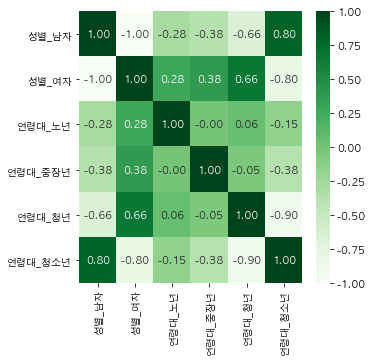

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# jupyter에서 matplotlib을 사용해 만든 graph를 화면에 표시하기 위해 필요
%matplotlib inline 

# 폰트 설정
from matplotlib import font_manager, rc
rc('font', family='AppleGothic')

#그래프의 축 등에서 음수를 표시할 때 minus sign이 깨지는 것 해결
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (5,5)
sns.heatmap(demodp.corr(),
           annot = True,
           fmt = '.2f',
           cmap = 'Greens',
           vmin = -1, vmax=1)

In [ ]:
# r=-1.000 ~ r=-0.600  높은 음의 상관관계
# r=-0.599 ~ r=-0.400  중간 음의 상관관계
# r=-3.999 ~ r=-0.200  낮은 음의 상관관계
# r=-0.199 ~ r=+0.199  무상관
# r=+0.200 ~ r=+0.399  낮은 양의 상관관계
# r=+0.400 ~ r=+0.599  중간 양의 상관관계
# r=+0.600 ~ r=+1.000  높은 양의 상관관계

#### 켄달

In [59]:
import scipy.stats as stats

# kendall
stats.kendalltau(data['성별'], data['연령대'])

KendalltauResult(correlation=-0.48840421038478093, pvalue=5.521147025895211e-10)

#### 스피어만

In [60]:
# spearman
stats.spearmanr(data['성별'], data['연령대'])

SpearmanrResult(correlation=-0.50651588001241, pvalue=3.235535084309362e-11)

In [89]:
data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,1_한식,2_한식,...,2_양식,3_양식,1_일식,2_일식,3_일식,1_중식,2_중식,3_중식,날짜,시간
0,2021-05-16 14:44:29.050,남자,청년,수도권,행복,한식,일식,중식,"불고기, 김치찌개",NaN,...,NaN,NaN,NaN,"돈가스, 초밥",NaN,NaN,NaN,짬뽕,05-16,14:44
1,2021-05-16 15:41:43.497,여자,중장년,서울,분노,한식,중식,일식,불고기,NaN,...,NaN,NaN,NaN,NaN,메밀소바,NaN,볶음밥,NaN,05-16,15:41
2,2021-05-16 15:44:12.635,남자,청년,서울,중립,일식,양식,한식,NaN,NaN,...,스테이크,NaN,"돈가스, 메밀소바",NaN,NaN,NaN,NaN,NaN,05-16,15:44
3,2021-05-16 15:46:32.896,여자,청년,서울,행복,일식,한식,분식,NaN,비빔밥,...,NaN,NaN,초밥,NaN,NaN,NaN,NaN,NaN,05-16,15:46
4,2021-05-16 16:15:52.830,남자,청년,경상도,행복,양식,일식,분식,NaN,NaN,...,NaN,NaN,NaN,"돈가스, 초밥",NaN,NaN,NaN,NaN,05-16,16:15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,2021-05-16 23:45:18.006,남자,청년,충청도,행복,한식,양식,일식,"비빔밥, 된장찌개",NaN,...,"파스타, 스테이크",NaN,NaN,NaN,"초밥, 메밀소바",NaN,NaN,NaN,05-16,23:45
147,2021-05-17 02:04:04.919,여자,청년,경상도,중립,한식,일식,양식,"비빔밥, 불고기",NaN,...,NaN,파스타,NaN,우동,NaN,NaN,NaN,NaN,05-17,02:04
148,2021-05-17 07:51:21.300,남자,청소년,경상도,행복,분식,한식,양식,NaN,김치찌개,...,NaN,스테이크,NaN,NaN,NaN,NaN,NaN,NaN,05-17,07:51
149,2021-05-17 07:57:58.848,남자,청소년,경상도,중립,중식,양식,한식,NaN,NaN,...,햄버거,NaN,NaN,NaN,NaN,짜장면,NaN,NaN,05-17,07:57


In [16]:
data.filter(regex='^1')

,1순위,1_한식,1_분식,1_양식,1_일식,1_중식
0,한식,"불고기, 김치찌개",NaN,NaN,NaN,NaN
1,한식,불고기,NaN,NaN,NaN,NaN
2,일식,NaN,NaN,NaN,"돈가스, 메밀소바",NaN
3,일식,NaN,NaN,NaN,초밥,NaN
4,양식,NaN,NaN,햄버거,NaN,NaN
...,...,...,...,...,...,...
146,한식,"비빔밥, 된장찌개",NaN,NaN,NaN,NaN
147,한식,"비빔밥, 불고기",NaN,NaN,NaN,NaN
148,분식,NaN,떡볶이,NaN,NaN,NaN
149,중식,NaN,NaN,NaN,NaN,짜장면


In [91]:
data.iloc[:,10].str.split(',', expand=True)

,0,1,2,3,4,5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,불고기,김치찌개,None,None,None,None
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
146,NaN,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN
149,비빔밥,불고기,된장찌개,None,None,None


In [95]:
data.iloc[:, 8:-2]

,1_한식,2_한식,3_한식,1_분식,2_분식,3_분식,1_양식,2_양식,3_양식,1_일식,2_일식,3_일식,1_중식,2_중식,3_중식
0,"불고기, 김치찌개",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"돈가스, 초밥",NaN,NaN,NaN,짬뽕
1,불고기,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,메밀소바,NaN,볶음밥,NaN
2,NaN,NaN,"불고기, 김치찌개",NaN,NaN,NaN,NaN,스테이크,NaN,"돈가스, 메밀소바",NaN,NaN,NaN,NaN,NaN
3,NaN,비빔밥,NaN,NaN,NaN,떡볶이,NaN,NaN,NaN,초밥,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,떡볶이,햄버거,NaN,NaN,NaN,"돈가스, 초밥",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,"비빔밥, 된장찌개",NaN,NaN,NaN,NaN,NaN,NaN,"파스타, 스테이크",NaN,NaN,NaN,"초밥, 메밀소바",NaN,NaN,NaN
147,"비빔밥, 불고기",NaN,NaN,NaN,NaN,NaN,NaN,NaN,파스타,NaN,우동,NaN,NaN,NaN,NaN
148,NaN,김치찌개,NaN,떡볶이,NaN,NaN,NaN,NaN,스테이크,NaN,NaN,NaN,NaN,NaN,NaN
149,NaN,NaN,"비빔밥, 불고기, 된장찌개",NaN,NaN,NaN,NaN,햄버거,NaN,NaN,NaN,NaN,짜장면,NaN,NaN
